In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
hotels = pd.read_excel("D:/STUDIES/Data Visualization/Data/HotelCustomersDataset.xlsx")

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
hotels["date"] = (pd.to_datetime("2018-12-31")- pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [5]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [12]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]
countries_subset = (hotels.loc[hotels["Nationality"].isin(countries)]\
             .groupby('Nationality')\
             .agg({"OtherRevenue":"sum", "LodgingRevenue":"sum"})\
             .sort_values(by="LodgingRevenue",ascending=False))

In [14]:
countries_subset.head()

,OtherRevenue,LodgingRevenue
Nationality,,
FRA,1033166.30,3809315.59
DEU,725541.53,3113382.55
PRT,665634.58,2715008.72
GBR,591212.77,2693123.61
ESP,319840.82,1475909.33


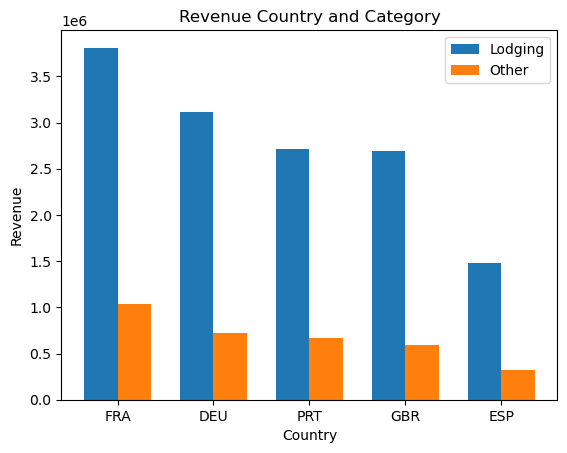

In [16]:
fig, ax = plt.subplots()

width = .35

x = np.arange(len(countries))

ax.bar(
    x - width/2,
    countries_subset["LodgingRevenue"],
    label = "Lodging",
    width = width
)

ax.bar(
    x + width/2,
    countries_subset["OtherRevenue"],
    label = "Other",
    width = width
)


ax.set_title("Revenue Country and Category")
ax.set_ylabel("Revenue")
ax.set_xlabel("Country")

plt.xticks(range(len(countries)), countries)

ax.legend()

In [17]:
countries_subset_pcts = countries_subset.apply(lambda x: x*100 / sum(x), axis = 1)

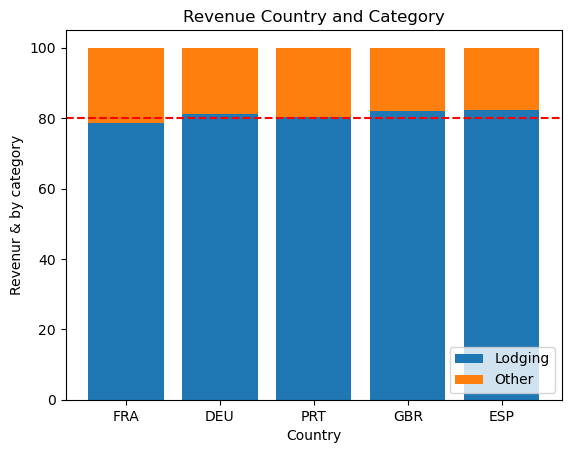

In [19]:
fig, ax = plt.subplots()

ax.bar(countries, countries_subset_pcts["LodgingRevenue"], label="Lodging")

ax.bar(countries, countries_subset_pcts["OtherRevenue"], label="Other", bottom=countries_subset_pcts["LodgingRevenue"])

ax.axhline(80, 0 , 1, c = "red", ls="--")  # starting from 80% 0 from left hand side, 1 upto right hand

ax.set_title("Revenue Country and Category")
ax.set_ylabel("Revenur & by category")
ax.set_xlabel("Country")

ax.legend(loc="lower right")